In [1]:
# importing required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, randint

# importing different metrics for performance measurement
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# importing modules for applying CROSS Validation and GridSearch on the dataset to find best parameters 
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

# importing XGBoost Library. It contains XGBRegressor and XGBClassifier modules
import xgboost as xgb


In [2]:
# import the data set
IData=pd.read_csv("income_train.csv",index_col='Id')
IData.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
# Checking the shape of the Data
print("Rows     : ",IData.shape[0])
print("Columns  : ",IData.shape[1])

Rows     :  9557
Columns  :  142


In [4]:
# checking null value count
IData.iloc[:, 0:20].isnull().sum()

v2a1        6860
hacdor         0
rooms          0
hacapo         0
v14a           0
refrig         0
v18q           0
v18q1       7342
r4h1           0
r4h2           0
r4h3           0
r4m1           0
r4m2           0
r4m3           0
r4t1           0
r4t2           0
r4t3           0
tamhog         0
tamviv         0
escolari       0
dtype: int64

In [5]:
# Since the number of columns are high then we will print the column names having null value

null_columns=IData.columns[IData.isnull().any()]
IData[null_columns].isnull().sum()


v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [6]:
#IData[IData["meaneduc"],"SQBmeaned"]].head()
IData[["meaneduc","SQBmeaned"]].head()
# Here SQ of meaneduc is SQBmeaned

,meaneduc,SQBmeaned
Id,,
ID_279628684,10.0,100.0
ID_f29eb3ddd,12.0,144.0
ID_68de51c94,11.0,121.0
ID_d671db89c,11.0,121.0
ID_d56d6f5f5,11.0,121.0


In [7]:

dMissing= IData[IData.meaneduc.isnull()]
dMissing[["meaneduc","SQBmeaned"]]

,meaneduc,SQBmeaned
Id,,
ID_bd8e11b0f,NaN,NaN
ID_46ff87316,NaN,NaN
ID_69f50bf3e,NaN,NaN
ID_db3168f9f,NaN,NaN
ID_2a7615902,NaN,NaN


In [8]:
# we will remove the 5 rows from original DataSet

IData=IData[~np.isnan(IData['meaneduc'])]


In [9]:
IData[["meaneduc","SQBmeaned"]].isnull().sum()

meaneduc     0
SQBmeaned    0
dtype: int64

In [10]:
IData[["v18q","v18q1"]].head(10)
# it seems that v18q1 column is not requied as it hold the same value of v18q

,v18q,v18q1
Id,,
ID_279628684,0,NaN
ID_f29eb3ddd,1,1.0
ID_68de51c94,0,NaN
ID_d671db89c,1,1.0
ID_d56d6f5f5,1,1.0
ID_ec05b1a7b,1,1.0
ID_e9e0c1100,1,1.0
ID_3e04e571e,0,NaN
ID_1284f8aad,0,NaN


In [11]:
IData[["v18q","v18q1"]].head(50)

,v18q,v18q1
Id,,
ID_279628684,0,NaN
ID_f29eb3ddd,1,1.0
ID_68de51c94,0,NaN
ID_d671db89c,1,1.0
ID_d56d6f5f5,1,1.0
ID_ec05b1a7b,1,1.0
ID_e9e0c1100,1,1.0
ID_3e04e571e,0,NaN
ID_1284f8aad,0,NaN


In [12]:
IData[["v2a1","rez_esc"]].head(5)

,v2a1,rez_esc
Id,,
ID_279628684,190000.0,NaN
ID_f29eb3ddd,135000.0,NaN
ID_68de51c94,NaN,NaN
ID_d671db89c,180000.0,1.0
ID_d56d6f5f5,180000.0,NaN


In [13]:
IData["rez_esc"].describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

In [14]:
IData["rez_esc"].value_counts()
# most of the rows having 0 value , so we can replace 0 all null value

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [15]:
IData["v2a1"].describe()
# most of the rows having 0 value , so we can replace 0 all null value

count    2.693000e+03
mean     1.652617e+05
std      1.505608e+05
min      0.000000e+00
25%      8.000000e+04
50%      1.300000e+05
75%      2.000000e+05
max      2.353477e+06
Name: v2a1, dtype: float64

In [16]:
# Replace -1 for null value 
IData["rez_esc"].fillna(-1,inplace=True)
IData['v2a1'].fillna(-1, inplace=True)

In [17]:
# drop v18q1 column
IData.drop(['v18q1'],axis=1,inplace=True)

In [18]:
# check null values at all exists

# Since the number of columns are high then we will print the column names having null value

null_columns=IData.columns[IData.isnull().any()]
IData[null_columns].isnull().sum()

# No missing value

Series([], dtype: float64)

### Data Type Checking

In [19]:
#Lets write one function to find out missing values ,unique values ,data types
def df_summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    
    ## converting all data to dataframe
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    
    ## renaming columns to default 0 to some sensible name
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    
    ## concatting the 3 dataframes. Remember pd.merge can merge only 2 df at a time
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    
    return output;  

In [20]:
IDSummary= df_summary(IData)
IDSummary.head()

,index,Missing Data,Unique Data,Data Types
0,v2a1,0,158,float64
1,hacdor,0,2,int64
2,rooms,0,11,int64
3,hacapo,0,2,int64
4,v14a,0,2,int64


In [21]:
IDSummary[IDSummary["Data Types"]=='object']

,index,Missing Data,Unique Data,Data Types
93,idhogar,0,2985,object
98,dependency,0,31,object
99,edjefe,0,22,object
100,edjefa,0,22,object


In [22]:
IData["idhogar"].value_counts()  
# this column doesnot have any meaning
#So we can drop ID,idhogar columns


fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
3fe29a56b    11
4476ccd4c    11
6b35cdcf0    11
f2a4cd356    10
63f11d6ea    10
a18c0c0be    10
0fc6c05f7    10
7cad2d6c4    10
6a96a96c0    10
ae489f548     9
06ca88023     9
322cefd2f     9
efec7e82c     9
1ed926340     9
9fd143d1f     9
9d70c1551     9
d4e1dc02c     9
476b3f2ee     9
d43a04997     9
a2f99b6bc     8
a32c04257     8
cd7c2ef1d     8
1c0b1cbd8     8
a4a67ad4e     8
493f97dcb     8
da2ecdcfd     8
             ..
bfb873d3a     1
d2cb24e59     1
aa2948d67     1
39f697073     1
9eb450831     1
53659cebb     1
9062ed6bc     1
4cc256324     1
86a6d2dfb     1
651241391     1
deb0479b9     1
d36946cfa     1
ad687ad89     1
a0695cb68     1
9451fba3d     1
3659d839d     1
21eb7fcc1     1
95d0c866d     1
2414080a4     1
a382bbff2     1
5e92f4165     1
357934434     1
141ac6fb3     1
8081498b6     1
a00d7a1be     1
bbed86e18     1
dd93b5a30     1
48446f702     1
7a883bf28     1
6894e9146     1
Name: idhogar, Length: 2

In [23]:
IData["dependency"].value_counts()
# here we need to conver Yes=1 and No=0 and do the type casting

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             373
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
.83333331      11
1.2            11
.22222222      11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [24]:
IData["edjefe"].value_counts()
# here we need to conver Yes=1 and No=0 and do the type casting to int

no     3761
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       135
16      134
yes     123
10      111
12      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [25]:
IData["edjefa"].value_counts()
# here we need to conver Yes=1 and No=0 and do the type casting to int

no     6226
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       95
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [26]:
map_col = {'yes': 1, 'no': 0}

IData['edjefa'] = IData['edjefa'].replace(map_col).astype(int)
IData['edjefe'] = IData['edjefe'].replace(map_col).astype(int)

In [27]:
IData['dependency'] = IData['dependency'].replace(map_col).astype(float)

In [28]:
# check the data type for object type 
IData.select_dtypes('object').head()

,idhogar
Id,
ID_279628684,21eb7fcc1
ID_f29eb3ddd,0e5d7a658
ID_68de51c94,2c7317ea8
ID_d671db89c,2b58d945f
ID_d56d6f5f5,2b58d945f


In [29]:
# drop ID and idhogar column
#IData.drop(['Id','idhogar'],axis=1,inplace=True)
IData.drop(['idhogar'],axis=1,inplace=True)

# now no object type column

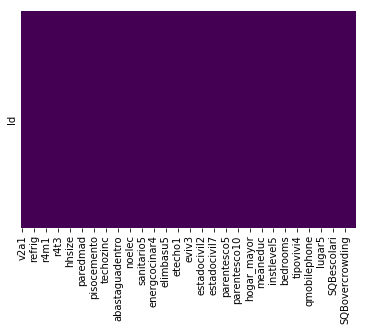

In [30]:
sns.heatmap(IData.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# cecking for any null value

# this shows there is no missing value in the dataset

### check dependant feature along with distribution

In [31]:
IDSummary.tail()

,index,Missing Data,Unique Data,Data Types
136,SQBovercrowding,0,37,float64
137,SQBdependency,0,31,float64
138,SQBmeaned,0,155,float64
139,agesq,0,97,int64
140,Target,0,4,int64


In [32]:
IData["Target"].value_counts()

4    5991
2    1597
3    1209
1     755
Name: Target, dtype: int64

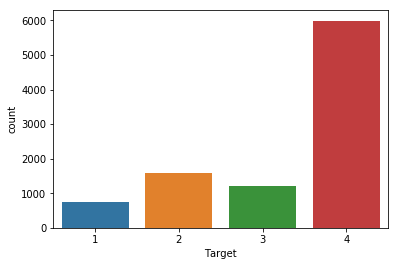

In [33]:
sns.countplot(x='Target',  data=IData)

# This is cearly shows that data is highly imbalance

### Apply XGBoost DT classifier

In [34]:
X = IData.drop(['Target'], axis=1)
y = IData['Target']

# split data into training and test set, for both features and target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.02, n_jobs=4,
                              objective="multi:softprob", random_state=42,eval_metric="merror")
# for more than 2 level classification output the eval_metric =merror for binary it is error

# early stopping rouds=10% of n_estimator
xgb_model.fit(X_train,y_train, early_stopping_rounds=50,eval_set=[(X_test,y_test)])
#xgb_model.fit(X_train, y_train)

y_pred=xgb_model.predict(X_test)

print("--------------Accuracy score----------------")
accuracy_score(y_test,y_pred)

[0]	validation_0-merror:0.29858
[1]	validation_0-merror:0.29606
[2]	validation_0-merror:0.29188
[3]	validation_0-merror:0.28685
[4]	validation_0-merror:0.28895
[5]	validation_0-merror:0.28518
[6]	validation_0-merror:0.28225
[7]	validation_0-merror:0.28308
[8]	validation_0-merror:0.28057
[9]	validation_0-merror:0.27764
[10]	validation_0-merror:0.27387
[11]	validation_0-merror:0.27513
[12]	validation_0-merror:0.27554
[13]	validation_0-merror:0.27429
[14]	validation_0-merror:0.27596
[15]	validation_0-merror:0.27554
[16]	validation_0-merror:0.27554
[17]	validation_0-merror:0.27513
[18]	validation_0-merror:0.27345
[19]	validation_0-merror:0.27094
[20]	validation_0-merror:0.27178
[21]	validation_0-merror:0.26968
[22]	validation_0-merror:0.26801
[23]	validation_0-merror:0.26591
[24]	validation_0-merror:0.26591
[25]	validation_0-merror:0.26633
[26]	validation_0-merror:0.26340
[27]	validation_0-merror:0.26131
[28]	validation_0-merror:0.26172
[29]	validation_0-merror:0.26214
[30]	validation_0-me

[245]	validation_0-merror:0.21357
[246]	validation_0-merror:0.21315
[247]	validation_0-merror:0.21273
[248]	validation_0-merror:0.21231
[249]	validation_0-merror:0.21231
[250]	validation_0-merror:0.21147
[251]	validation_0-merror:0.21105
[252]	validation_0-merror:0.21105
[253]	validation_0-merror:0.21105
[254]	validation_0-merror:0.21105
[255]	validation_0-merror:0.21105
[256]	validation_0-merror:0.20896
[257]	validation_0-merror:0.20938
[258]	validation_0-merror:0.20938
[259]	validation_0-merror:0.20854
[260]	validation_0-merror:0.20854
[261]	validation_0-merror:0.20854
[262]	validation_0-merror:0.20645
[263]	validation_0-merror:0.20645
[264]	validation_0-merror:0.20603
[265]	validation_0-merror:0.20603
[266]	validation_0-merror:0.20394
[267]	validation_0-merror:0.20352
[268]	validation_0-merror:0.20310
[269]	validation_0-merror:0.20310
[270]	validation_0-merror:0.20310
[271]	validation_0-merror:0.20226
[272]	validation_0-merror:0.20226
[273]	validation_0-merror:0.20100
[274]	validati

[486]	validation_0-merror:0.17379
[487]	validation_0-merror:0.17420
[488]	validation_0-merror:0.17420
[489]	validation_0-merror:0.17379
[490]	validation_0-merror:0.17379
[491]	validation_0-merror:0.17379
[492]	validation_0-merror:0.17379
[493]	validation_0-merror:0.17337
[494]	validation_0-merror:0.17379
[495]	validation_0-merror:0.17379
[496]	validation_0-merror:0.17379
[497]	validation_0-merror:0.17337
[498]	validation_0-merror:0.17337
[499]	validation_0-merror:0.17295
[500]	validation_0-merror:0.17253
[501]	validation_0-merror:0.17253
[502]	validation_0-merror:0.17253
[503]	validation_0-merror:0.17295
[504]	validation_0-merror:0.17295
[505]	validation_0-merror:0.17295
[506]	validation_0-merror:0.17211
[507]	validation_0-merror:0.17253
[508]	validation_0-merror:0.17253
[509]	validation_0-merror:0.17253
[510]	validation_0-merror:0.17295
[511]	validation_0-merror:0.17295
[512]	validation_0-merror:0.17211
[513]	validation_0-merror:0.17127
[514]	validation_0-merror:0.17211
[515]	validati

[727]	validation_0-merror:0.14824
[728]	validation_0-merror:0.14824
[729]	validation_0-merror:0.14824
[730]	validation_0-merror:0.14782
[731]	validation_0-merror:0.14782
[732]	validation_0-merror:0.14782
[733]	validation_0-merror:0.14740
[734]	validation_0-merror:0.14699
[735]	validation_0-merror:0.14657
[736]	validation_0-merror:0.14699
[737]	validation_0-merror:0.14699
[738]	validation_0-merror:0.14699
[739]	validation_0-merror:0.14699
[740]	validation_0-merror:0.14699
[741]	validation_0-merror:0.14699
[742]	validation_0-merror:0.14657
[743]	validation_0-merror:0.14657
[744]	validation_0-merror:0.14657
[745]	validation_0-merror:0.14657
[746]	validation_0-merror:0.14657
[747]	validation_0-merror:0.14657
[748]	validation_0-merror:0.14699
[749]	validation_0-merror:0.14699
[750]	validation_0-merror:0.14699
[751]	validation_0-merror:0.14657
[752]	validation_0-merror:0.14657
[753]	validation_0-merror:0.14699
[754]	validation_0-merror:0.14699
[755]	validation_0-merror:0.14657
[756]	validati

0.8584589614740369

In [35]:
# Accuracy score 85%
# Confusion metrix
print(confusion_matrix(y_test, y_pred))

[[ 128   14    1   29]
 [  11  284   19   96]
 [   1   30  176  109]
 [   0   18   10 1462]]


In [36]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.141541, best iteration: 864, best ntree limit 865


### Using Random Forest and GridSearchCV

In [37]:
from sklearn.ensemble import RandomForestClassifier

error =[]
for i in range (10,1000,50):
    classifier=RandomForestClassifier(n_estimators=i,random_state=10)
    classifier.fit(X_train,y_train)
    pred_i=classifier.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

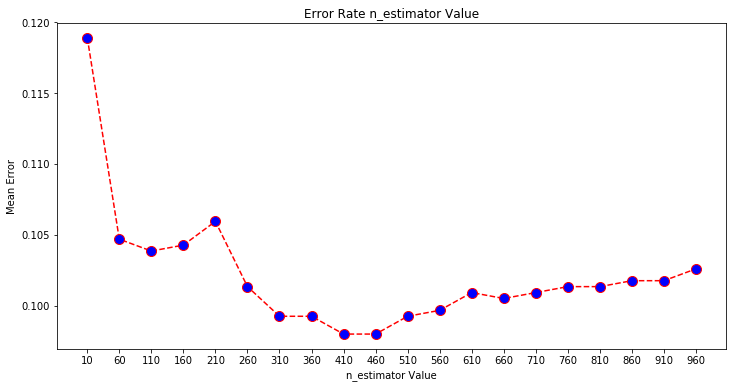

In [38]:
#-- Now please plot the error values vs. n_estimator
plt.figure(figsize=(12, 6))  
# x is range(10,201,10) and y is error value
plt.plot(range(10, 1000, 50), error, color='red', 
         linestyle='dashed', marker='o', markerfacecolor='blue', 
         markersize=10)
plt.xticks(np.arange(10, 1000, step=50))
plt.title('Error Rate n_estimator Value')  
plt.xlabel('n_estimator Value')  
plt.ylabel('Mean Error'); 
# Here we can see using estimator 410 we are getting least mean error now apply this to RFDT

In [39]:
# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=410, random_state=10)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)


# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))
# so using this Model we are getting 90% accuracy which is better than XGBoost

[[ 135   11    0   26]
 [   9  321   10   70]
 [   0   15  217   84]
 [   1    2    6 1481]]
              precision    recall  f1-score   support

           1       0.93      0.78      0.85       172
           2       0.92      0.78      0.85       410
           3       0.93      0.69      0.79       316
           4       0.89      0.99      0.94      1490

    accuracy                           0.90      2388
   macro avg       0.92      0.81      0.86      2388
weighted avg       0.90      0.90      0.90      2388

0.9020100502512562


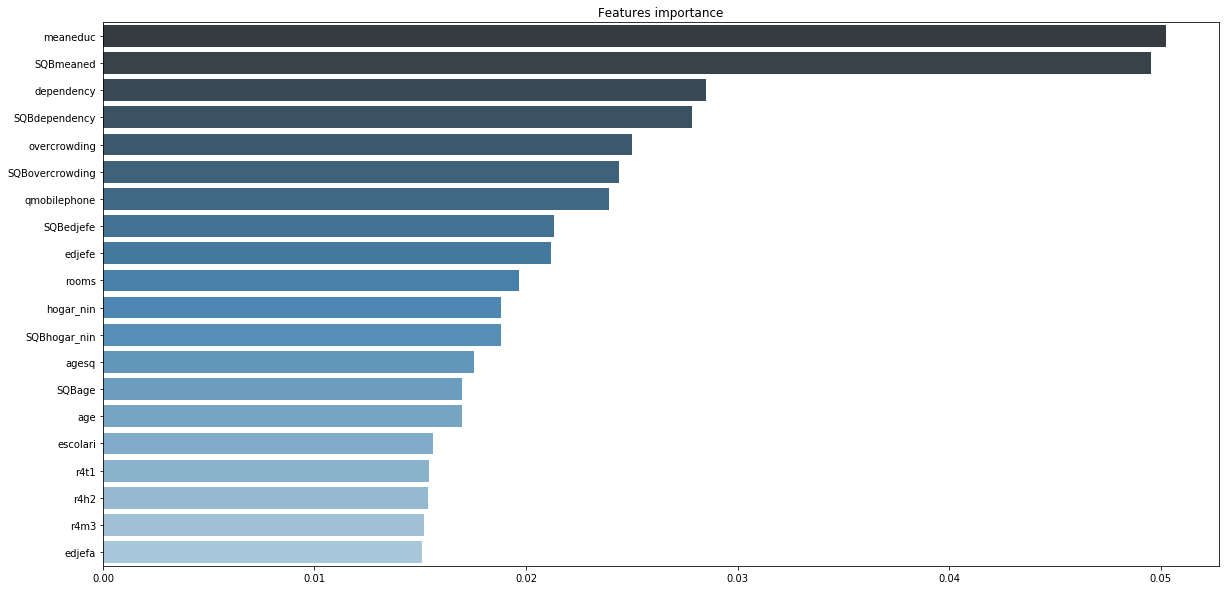

In [40]:
# Now we will check which are the 20 most important features

# plot features important which featues are playing a vital role for attrition
imp=pd.Series(data=regressor.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(20,10))
plt.title("Features importance")
ax=sns.barplot(y=imp.index,x=imp.values,palette="Blues_d",orient='h')

In [41]:
## Taking lot of time to execute
## Using GridSearchCV

#from sklearn.model_selection import GridSearchCV

# use the full grid over all parameters
#param_grid={"max_depth":[10,None],
#           "max_features":[5,10,20],
#           "min_samples_split":[2,3,10],
#            "bootstrap": [True,False],
#           "criterion":["gini","entropy"]}

# run grid search
#grid_search=GridSearchCV(regressor,param_grid=param_grid, cv=5)
#grid_search.fit(X_train,y_train)

In [42]:
#grid_search.best_params_

### So we have to consider better accuracy model i.e RandomeForestClassifier model not XGBoostDtClassifier

## Apply RFDTClassifier with nestimators=410 on income test Data Set

In [43]:
# import the data set
TestData=pd.read_csv("income_test.csv",index_col='Id')
TestData.head()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [45]:

# Checking the shape of the Data
print("Rows     : ",TestData.shape[0])
print("Columns  : ",TestData.shape[1])

Rows     :  23856
Columns  :  141


In [46]:
null_columns=TestData.columns[TestData.isnull().any()]
TestData[null_columns].isnull().sum()

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [47]:
TestData=TestData[~np.isnan(TestData['meaneduc'])]

In [48]:
# Replace -1 for null value 
TestData["rez_esc"].fillna(-1,inplace=True)
TestData['v2a1'].fillna(-1, inplace=True)

In [49]:
# drop v18q1 column
TestData.drop(['v18q1'],axis=1,inplace=True)

In [50]:
TestData['edjefa'] = TestData['edjefa'].replace(map_col).astype(int)
TestData['edjefe'] = TestData['edjefe'].replace(map_col).astype(int)

In [51]:
TestData['dependency'] = TestData['dependency'].replace(map_col).astype(float)

In [52]:
null_columns=TestData.columns[TestData.isnull().any()]
TestData[null_columns].isnull().sum()
# No null value now in test data

Series([], dtype: float64)

In [53]:
TestData.drop(['idhogar'],axis=1,inplace=True)

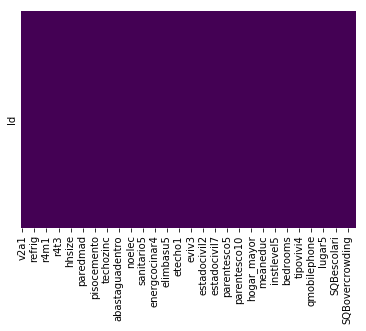

In [54]:
# show any null value
sns.heatmap(TestData.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [55]:
# Apply Model
TestData.tail(5)


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,
ID_a065a7cad,-1.0,1,2,1,1,1,0,0,2,2,...,10,9,100,36,25,4,36.0,0.25,33.0625,100
ID_1a7c6953b,-1.0,0,3,0,1,1,0,0,1,1,...,54,36,2916,16,36,4,4.0,1.00,36.0000,2916
ID_07dbb4be2,-1.0,0,3,0,1,1,0,0,1,1,...,12,16,144,16,36,4,4.0,1.00,36.0000,144
ID_34d2ed046,-1.0,0,3,0,1,1,0,0,1,1,...,12,25,144,16,36,4,4.0,1.00,36.0000,144
ID_34754556f,-1.0,0,3,0,1,1,0,0,1,1,...,51,36,2601,16,36,4,4.0,1.00,36.0000,2601


In [57]:
y_test_pred_raw=regressor.predict(TestData)

In [60]:
y_test_pred_raw[0:5]

array([4, 4, 4, 4, 4], dtype=int64)

In [61]:
y_test_pred = pd.DataFrame(y_test_pred_raw, index=TestData.index, columns=['Target'])

In [63]:
y_test_pred.Target.value_counts()

4    19478
2     3120
3      628
1      599
Name: Target, dtype: int64

In [65]:
y_test_pred.to_csv('final_output.csv')